# Iris dataset k-means clustering

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

In [17]:
iris_data = load_iris()
iris_dataset = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
target_df = pd.DataFrame(iris_data.target, columns=['class'])

iris_df = pd.concat([iris_dataset, target_df], axis=1)

iris_df.sample(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
99,5.7,2.8,4.1,1.3,1
136,6.3,3.4,5.6,2.4,2
6,4.6,3.4,1.4,0.3,0
115,6.4,3.2,5.3,2.3,2
78,6.0,2.9,4.5,1.5,1


In [18]:
iris_df.shape

(150, 5)

In [19]:
iris_df = iris_df.sample(frac=1).reset_index(drop = True)

In [20]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.9,3.0,4.2,1.5,1
1,5.8,2.7,5.1,1.9,2
2,5.6,2.9,3.6,1.3,1
3,5.4,3.4,1.5,0.4,0
4,6.3,3.3,6.0,2.5,2


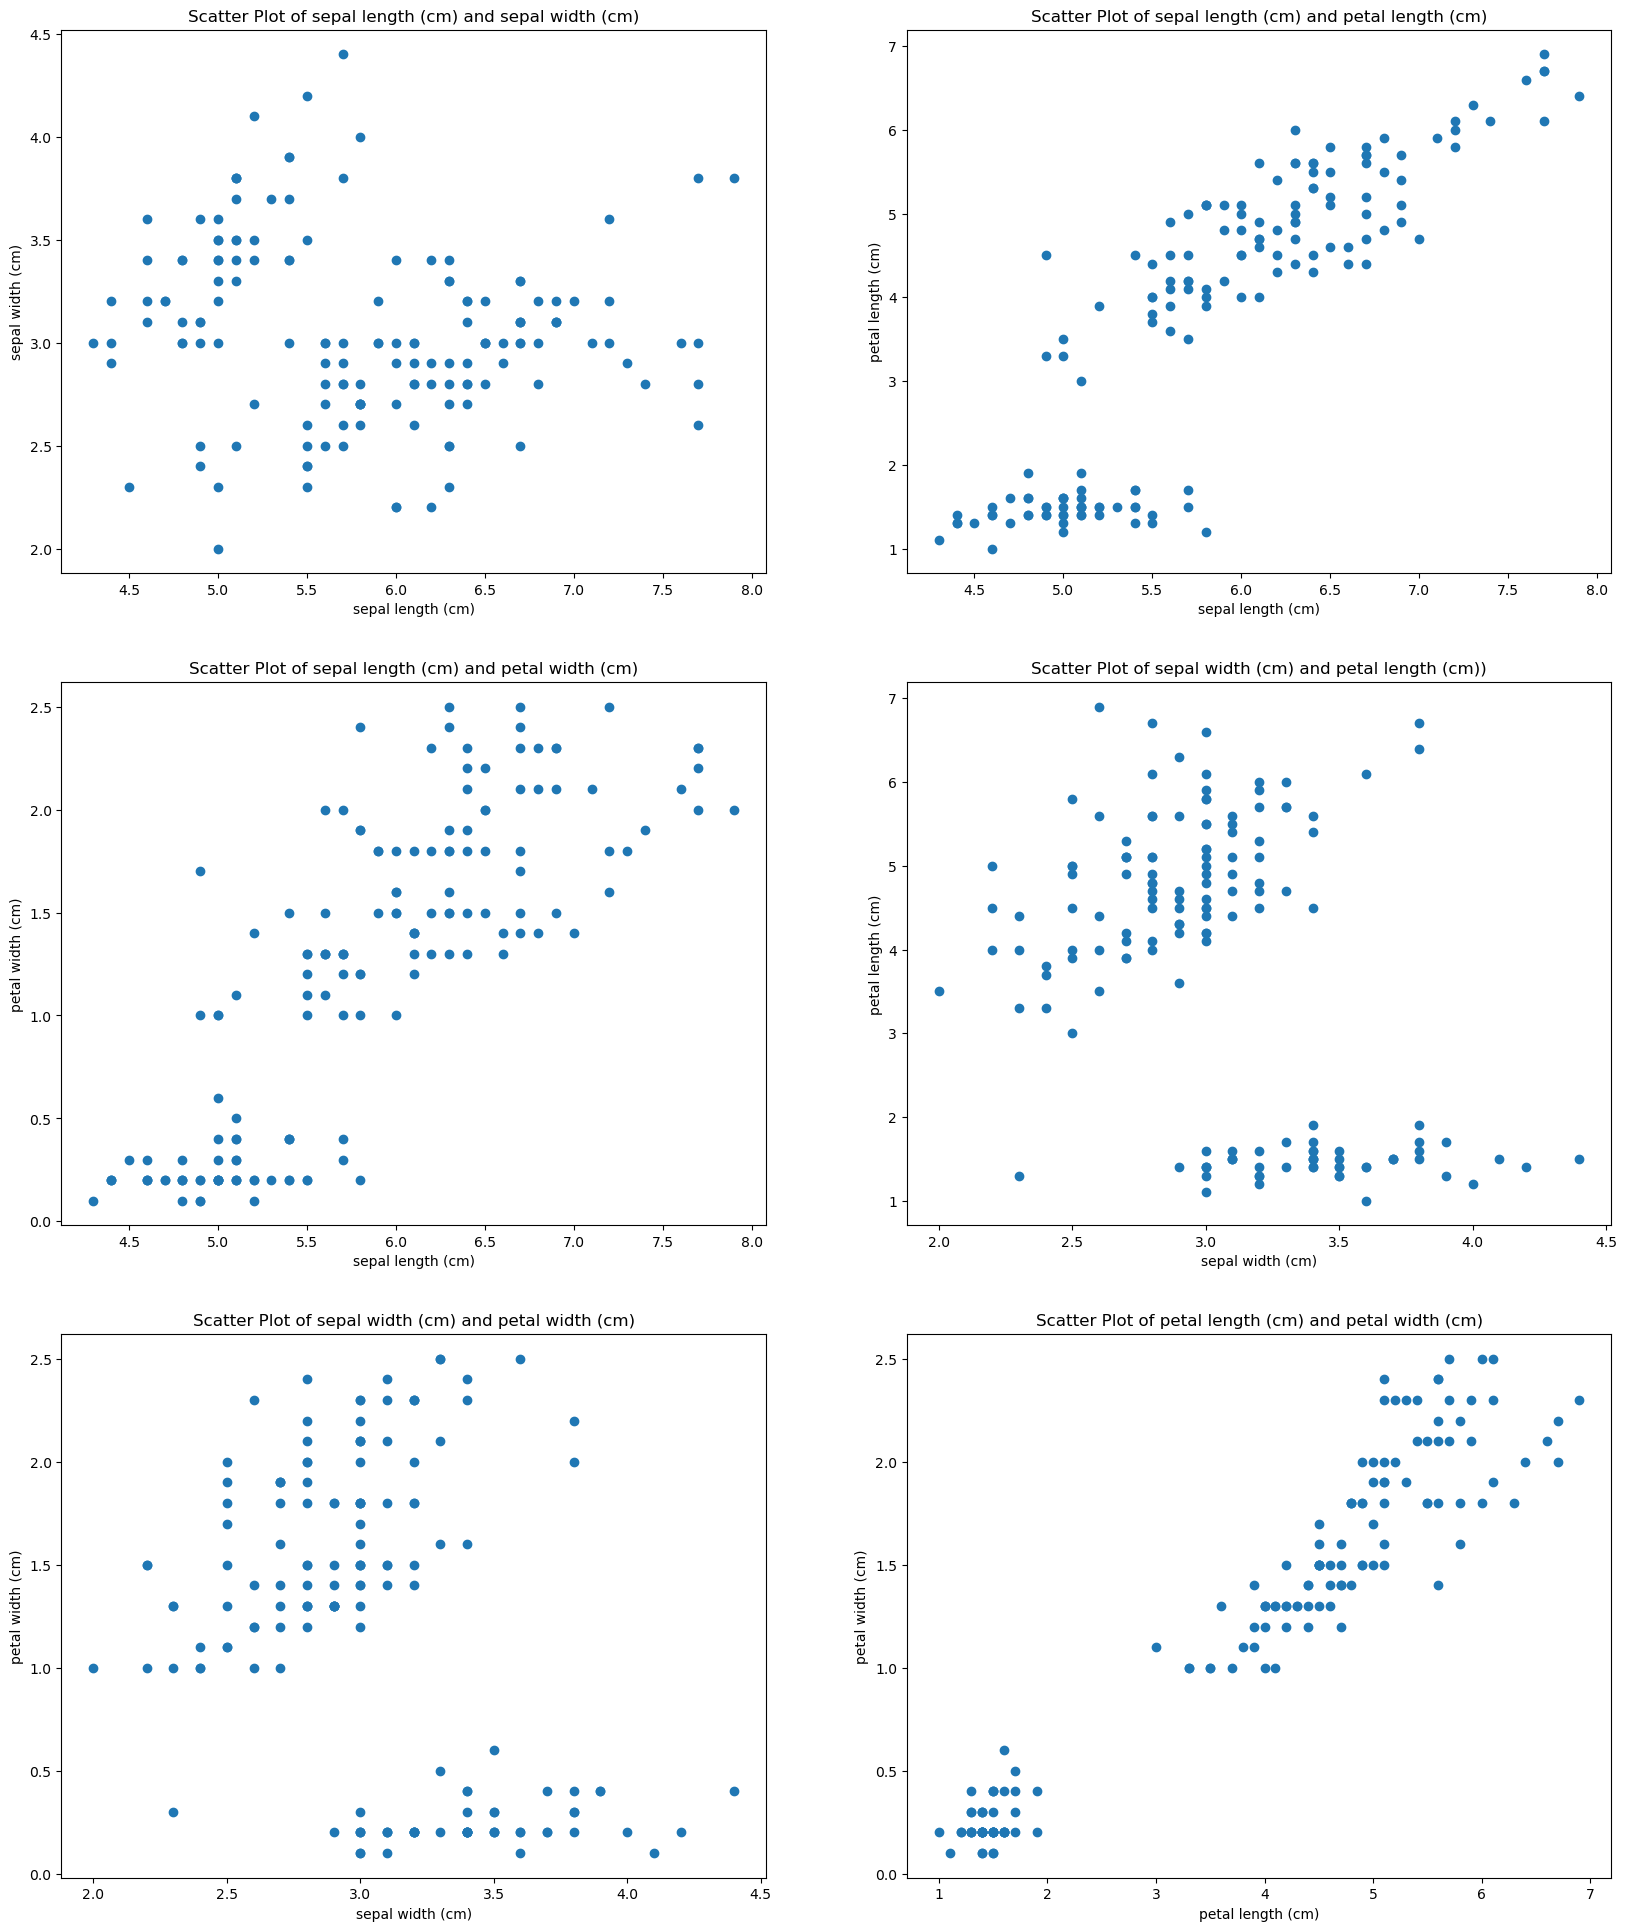

In [21]:
fig, axes = plt.subplots(3, 2, figsize=(20, 24))


axes[0, 0].scatter(x = iris_df["sepal length (cm)"], y = iris_df["sepal width (cm)"])
axes[0, 0].set_xlabel('sepal length (cm)')
axes[0, 0].set_ylabel('sepal width (cm)')
axes[0, 0].set_title('Scatter Plot of sepal length (cm) and sepal width (cm)')


axes[0, 1].scatter(x = iris_df["sepal length (cm)"], y = iris_df["petal length (cm)"])
axes[0, 1].set_xlabel('sepal length (cm)')
axes[0, 1].set_ylabel('petal length (cm)')
axes[0, 1].set_title('Scatter Plot of sepal length (cm) and petal length (cm)')


axes[1, 0].scatter(x = iris_df["sepal length (cm)"], y = iris_df["petal width (cm)"])
axes[1, 0].set_xlabel('sepal length (cm)')
axes[1, 0].set_ylabel('petal width (cm)')
axes[1, 0].set_title('Scatter Plot of sepal length (cm) and petal width (cm)')


axes[1, 1].scatter(x = iris_df["sepal width (cm)"], y = iris_df["petal length (cm)"])
axes[1, 1].set_xlabel('sepal width (cm)')
axes[1, 1].set_ylabel('petal length (cm)')
axes[1, 1].set_title('Scatter Plot of sepal width (cm) and petal length (cm))')


axes[2, 0].scatter(x = iris_df["sepal width (cm)"], y = iris_df["petal width (cm)"])
axes[2, 0].set_xlabel('sepal width (cm)')
axes[2, 0].set_ylabel('petal width (cm)')
axes[2, 0].set_title('Scatter Plot of sepal width (cm) and petal width (cm)')


axes[2, 1].scatter(x = iris_df["petal length (cm)"], y = iris_df["petal width (cm)"])
axes[2, 1].set_xlabel('petal length (cm)')
axes[2, 1].set_ylabel('petal width (cm)')
axes[2, 1].set_title('Scatter Plot of petal length (cm) and petal width (cm)')
plt.show()

In [22]:
iris_2D = iris_df[["sepal length (cm)", "petal length (cm)"]]
iris_2D.head()

,sepal length (cm),petal length (cm)
0,5.9,4.2
1,5.8,5.1
2,5.6,3.6
3,5.4,1.5
4,6.3,6.0


In [23]:
from sklearn.cluster import KMeans
kmeans_model = KMeans(n_clusters=3, max_iter=10000).fit(iris_2D)

c:\Users\siddh\anaconda3\envs\ml-project\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [24]:
labelsTrain = kmeans_model.labels_
print(labelsTrain)

centroids = kmeans_model.cluster_centers_
print(centroids)

[2 2 2 1 0 2 0 0 0 0 2 1 0 1 1 2 1 1 0 1 2 1 1 1 1 2 1 0 1 0 2 2 0 0 1 2 1
 0 1 2 2 1 0 1 2 0 0 1 2 0 1 0 0 1 1 1 0 2 1 2 0 1 2 0 1 1 1 2 1 1 2 0 2 1
 0 1 2 2 2 1 0 0 2 1 0 2 1 2 2 0 1 1 2 2 2 1 1 2 0 0 0 0 2 0 2 2 0 2 1 2 0
 1 0 2 1 2 0 0 2 2 1 2 1 1 2 1 2 2 1 2 1 2 0 0 2 2 2 2 2 2 1 2 0 1 2 0 2 2
 1 2]
[[6.83902439 5.67804878]
 [5.00784314 1.49215686]
 [5.87413793 4.39310345]]


C:\Users\siddh\AppData\Local\Temp\ipykernel_13352\4100797492.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  point_x, point_y = row[0], row[1]


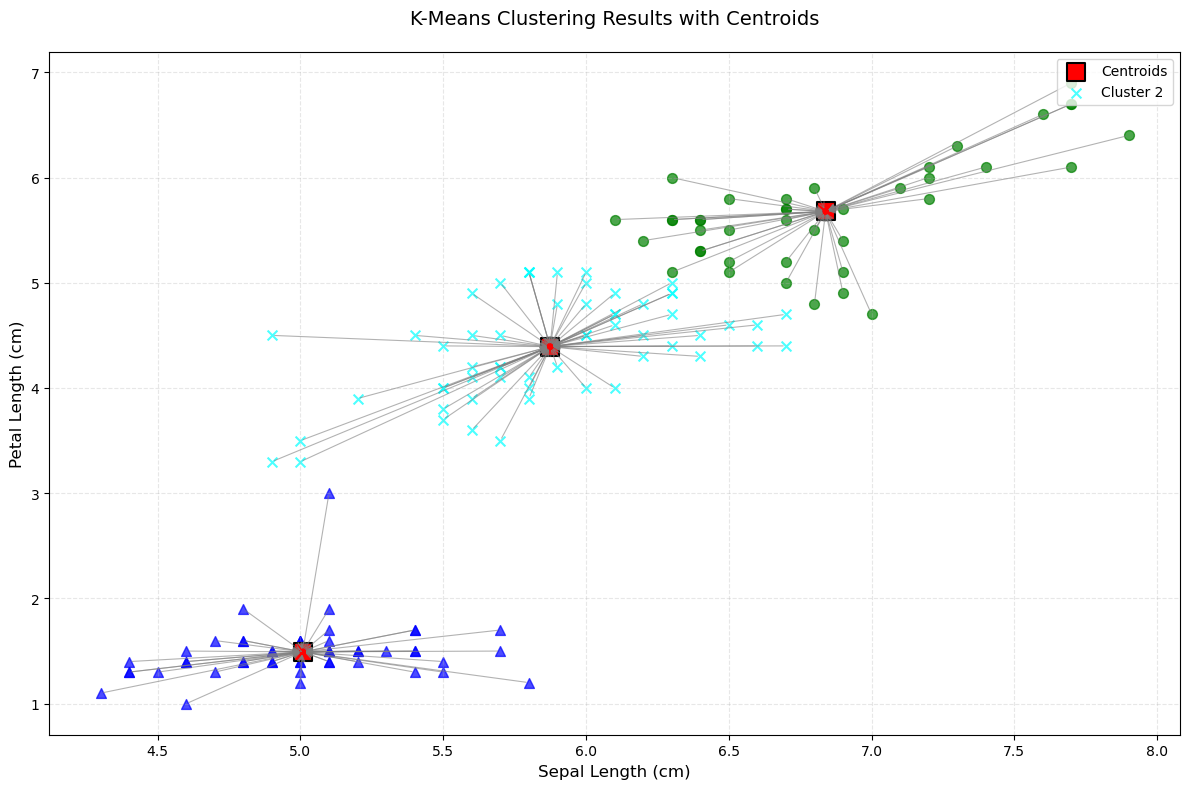

In [25]:
# Create figure and axes
fig, ax = plt.subplots(figsize=(12, 8))

# Define color and marker mapping for better readability
CLUSTER_STYLES = {
    0: {'color': 'green', 'marker': 'o', 'label': 'Cluster 0'},
    1: {'color': 'blue', 'marker': '^', 'label': 'Cluster 1'}, 
    2: {'color': 'cyan', 'marker': 'x', 'label': 'Cluster 2'}
}

# Plot centroids with better styling
ax.scatter(x=centroids[:, 0], y=centroids[:, 1], 
           c='red', s=150, marker='s', label='Centroids', 
           edgecolor='black', linewidth=1.5, zorder=3)

# Plot data points and arrows
for idx, row in iris_2D.iterrows():
    cluster_id = labelsTrain[idx]
    point_x, point_y = row[0], row[1]
    centroid_x, centroid_y = centroids[cluster_id, 0], centroids[cluster_id, 1]
    
    # Add arrow from point to centroid
    ax.annotate("", 
                xy=(centroid_x, centroid_y), 
                xytext=(point_x, point_y),
                arrowprops={
                    "arrowstyle": "->", 
                    "color": "gray", 
                    "lw": 0.8,
                    "alpha": 0.6
                })
    
    # Plot data point with cluster-specific style
    style = CLUSTER_STYLES[cluster_id]
    ax.scatter(x=point_x, y=point_y, 
               c=style['color'], marker=style['marker'],
               alpha=0.7, s=50, label=style['label'] if idx == 0 else "")

# Improve labels and title
ax.set_xlabel('Sepal Length (cm)', fontsize=12)
ax.set_ylabel('Petal Length (cm)', fontsize=12)
ax.set_title('K-Means Clustering Results with Centroids', fontsize=14, pad=20)

# Add legend without duplicates
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys(), 
          loc='upper right', frameon=True, fancybox=True)

# Add grid for better readability
ax.grid(True, alpha=0.3, linestyle='--')

# Improve layout
plt.tight_layout()
plt.show()

In [26]:
from sklearn import metrics

labels = iris_df['class']

print("Homogeneity score : ", metrics.homogeneity_score(labels, kmeans_model.labels_))
print("Completeness score : ", metrics.completeness_score(labels, kmeans_model.labels_))
print("V_Measure score : ", metrics.v_measure_score(labels, kmeans_model.labels_))
print("adjusted rand score : ", metrics.adjusted_rand_score(labels, kmeans_model.labels_))
print("adjusted mutual info score : ", metrics.adjusted_mutual_info_score(labels, kmeans_model.labels_))
print("Silhouette score : ", metrics.silhouette_score(iris_2D, kmeans_model.labels_))

Homogeneity score :  0.7033177646052958
Completeness score :  0.7096993707802843
V_Measure score :  0.706494157075837
adjusted rand score :  0.6988627672348092
adjusted mutual info score :  0.7028024531409133
Silhouette score :  0.5890584158017611


## All features

In [34]:
iris_features = iris_df.drop(columns=['class'])
kmeans_model_all = KMeans(n_clusters=3, max_iter=100000, random_state=42).fit(iris_features)

c:\Users\siddh\anaconda3\envs\ml-project\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [32]:
labelsTrainAll = kmeans_model_all.labels_
centroidsAll = kmeans_model_all.cluster_centers_

print("Cluster labels:", labelsTrainAll)
print("Centroids shape:", centroidsAll.shape)
print("Centroids:\n", centroidsAll)

Cluster labels: [0 0 0 1 2 0 2 2 2 0 0 1 2 1 1 0 1 1 2 1 0 1 1 1 1 0 1 2 1 2 0 0 0 2 1 0 1
 2 1 0 0 1 2 1 0 2 2 1 0 2 1 2 2 0 1 1 2 0 1 0 2 1 0 2 1 1 1 0 1 1 0 2 0 1
 0 1 0 0 0 1 2 2 0 1 2 0 1 0 0 2 1 1 0 0 0 1 1 0 2 2 2 2 0 2 0 0 2 0 1 0 2
 1 2 0 1 0 2 2 0 0 1 0 1 1 0 1 0 0 1 0 1 0 2 2 0 0 0 0 0 0 1 0 2 1 0 2 0 0
 1 0]
Centroids shape: (3, 4)
Centroids:
 [[5.9016129  2.7483871  4.39354839 1.43387097]
 [5.006      3.428      1.462      0.246     ]
 [6.85       3.07368421 5.74210526 2.07105263]]


C:\Users\siddh\AppData\Local\Temp\ipykernel_13352\1777581964.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  point_x, point_y = row[0], row[1]  # First two features


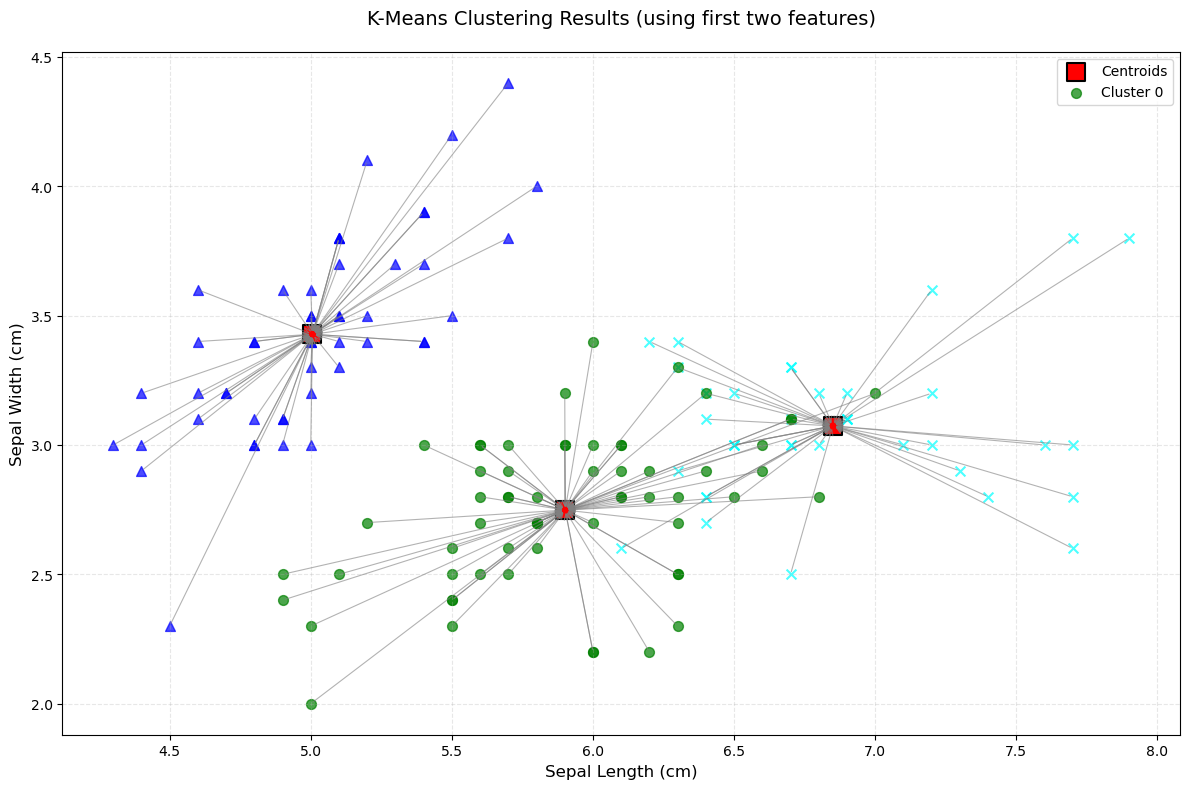

In [35]:
# Create figure and axes
fig, ax = plt.subplots(figsize=(12, 8))

# Define color and marker mapping for better readability
CLUSTER_STYLES = {
    0: {'color': 'green', 'marker': 'o', 'label': 'Cluster 0'},
    1: {'color': 'blue', 'marker': '^', 'label': 'Cluster 1'}, 
    2: {'color': 'cyan', 'marker': 'x', 'label': 'Cluster 2'}
}

# Since we trained on 4D data but want to plot in 2D, we have two options:

# OPTION 1: Use the first two features for plotting (sepal length and sepal width)
ax.scatter(x=centroidsAll[:, 0], y=centroidsAll[:, 1], 
           c='red', s=150, marker='s', label='Centroids', 
           edgecolor='black', linewidth=1.5, zorder=3)

# Plot data points using first two features
for idx, row in iris_features.iterrows():
    cluster_id = labelsTrainAll[idx]
    point_x, point_y = row[0], row[1]  # First two features
    centroid_x, centroid_y = centroidsAll[cluster_id, 0], centroidsAll[cluster_id, 1]

    # Add arrow from point to centroid
    ax.annotate("", 
                xy=(centroid_x, centroid_y), 
                xytext=(point_x, point_y),
                arrowprops={
                    "arrowstyle": "->", 
                    "color": "gray", 
                    "lw": 0.8,
                    "alpha": 0.6
                })
    
    # Plot data point with cluster-specific style
    style = CLUSTER_STYLES[cluster_id]
    ax.scatter(x=point_x, y=point_y, 
               c=style['color'], marker=style['marker'],
               alpha=0.7, s=50, label=style['label'] if idx == 0 else "")

# Improve labels and title
ax.set_xlabel('Sepal Length (cm)', fontsize=12)
ax.set_ylabel('Sepal Width (cm)', fontsize=12)
ax.set_title('K-Means Clustering Results (using first two features)', fontsize=14, pad=20)

# Add legend without duplicates
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys(), 
          loc='upper right', frameon=True, fancybox=True)

# Add grid for better readability
ax.grid(True, alpha=0.3, linestyle='--')

# Improve layout
plt.tight_layout()
plt.show()

In [36]:
from sklearn import metrics

labels = iris_df['class']

print("Homogeneity score : ", metrics.homogeneity_score(labels, kmeans_model_all.labels_))
print("Completeness score : ", metrics.completeness_score(labels, kmeans_model_all.labels_))
print("V_Measure score : ", metrics.v_measure_score(labels, kmeans_model_all.labels_))
print("adjusted rand score : ", metrics.adjusted_rand_score(labels, kmeans_model_all.labels_))
print("adjusted mutual info score : ", metrics.adjusted_mutual_info_score(labels, kmeans_model_all.labels_))
print("Silhouette score : ", metrics.silhouette_score(iris_2D, kmeans_model_all.labels_))

Homogeneity score :  0.7514854021988338
Completeness score :  0.7649861514489815
V_Measure score :  0.7581756800057784
adjusted rand score :  0.7302382722834697
adjusted mutual info score :  0.7551191675800484
Silhouette score :  0.5895901803685984
